<a href="https://colab.research.google.com/github/ybenabed/supervied_learning_MLDS2021/blob/main/bank_client_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

## Chagement de donnees

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
bank_df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv", names=["status_cce",
"duree_mois",
"hist_credit",
"obj",
"montant_credit",
"compte_epargne",
"emplois_depuis",
"taux_vers_revenu",
"status_sexe",
"autres_debits",
"residence_depuis",
"prop",
"age",
"plans_vers",
"log",
"nbr_credits",
"travail",
"nbr_per_charge",
"tel",
"trav_etranger","label"],
index_col=False)

In [ ]:
bank_df.head()

,status_cce,duree_mois,hist_credit,obj,montant_credit,compte_epargne,emplois_depuis,taux_vers_revenu,status_sexe,autres_debits,residence_depuis,prop,age,plans_vers,log,nbr_credits,travail,nbr_per_charge,tel,trav_etranger,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
bank_df.shape

(1000, 21)

Cet ensemble de données comprend 1000 exemples et 20 variables, avec une variable supplémentaire "label" indiquant la classe correspondante à chaque individu.

En visualisant le nombre de valeurs nulles qui existent dans chacune des collones, on remarque que ce jeux de données ne contient aucune valeur nulle qui peut affecter l'apprentissage.

In [ ]:
bank_df.isnull().sum()

status_cce          0
duree_mois          0
hist_credit         0
obj                 0
montant_credit      0
compte_epargne      0
emplois_depuis      0
taux_vers_revenu    0
status_sexe         0
autres_debits       0
residence_depuis    0
prop                0
age                 0
plans_vers          0
log                 0
nbr_credits         0
travail             0
nbr_per_charge      0
tel                 0
trav_etranger       0
label               0
dtype: int64

## Analyse Exploratoire

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_cce        1000 non-null   object
 1   duree_mois        1000 non-null   int64 
 2   hist_credit       1000 non-null   object
 3   obj               1000 non-null   object
 4   montant_credit    1000 non-null   int64 
 5   compte_epargne    1000 non-null   object
 6   emplois_depuis    1000 non-null   object
 7   taux_vers_revenu  1000 non-null   int64 
 8   status_sexe       1000 non-null   object
 9   autres_debits     1000 non-null   object
 10  residence_depuis  1000 non-null   int64 
 11  prop              1000 non-null   object
 12  age               1000 non-null   int64 
 13  plans_vers        1000 non-null   object
 14  log               1000 non-null   object
 15  nbr_credits       1000 non-null   int64 
 16  travail           1000 non-null   object
 17  nbr_per_charge 

### Analyse de quelques varaibles numerique particulieres

#### Taux vers revenu

In [ ]:
bank_df['taux_vers_revenu'].unique()

array([4, 2, 3, 1])

La variable taux vers revenu: Taux de versement en pourcentage du revenu disponible. Elle ne contient que 4 valeurs distinctes pour tous les individus. On la considère comme une variable qualitative.

#### Duree Mois

In [ ]:
bank_df["duree_mois"].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: duree_mois, dtype: int64

In [ ]:
bank_df["duree_mois"].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duree_mois, dtype: float64

On peut transformer la variable duree_mois en une variable categorique en utiltisant des intervalles de coupures, les quartiles par exemple.

#### Residence depuis

In [ ]:
bank_df["residence_depuis"].describe()

count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: residence_depuis, dtype: float64

In [ ]:
bank_df["residence_depuis"].value_counts()

4    413
2    308
3    149
1    130
Name: residence_depuis, dtype: int64

La variable residence_depuis ne contient que 4 valeurs distinctes pour tous les individus. On la considère une variable qualitative.

#### Age

In [ ]:
bank_df["age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

In [ ]:
bank_df["age"].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])

#### Nombre de credit

In [ ]:
bank_df["nbr_credits"].unique()

array([2, 1, 3, 4])

In [ ]:
bank_df["nbr_credits"].value_counts()

1    633
2    333
3     28
4      6
Name: nbr_credits, dtype: int64

La variable nbr_credits: "Nombre de credits" ne contient que 4 valeurs distinctes pour tous les individus. On la considère une variable qualitative.

#### Nombre de personnes en charge

In [ ]:
bank_df["nbr_per_charge"].unique()

array([1, 2])

In [ ]:
bank_df["nbr_per_charge"].value_counts()

1    845
2    155
Name: nbr_per_charge, dtype: int64

La variable nbr_per_charge: "Nombre de personnes" ne contient que 2 valeurs distinctes pour tous les individus. On la considère une variable qualitative.

#### Description sur les variables quantatives

In [ ]:
bank_numerical_variable = ['duree_mois', 'montant_credit', 'age', 'nbr_credits']
bank_df[bank_numerical_variable].describe()

,duree_mois,montant_credit,age,nbr_credits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000,1.407000
std,12.058814,2822.736876,11.375469,0.577654
min,4.000000,250.000000,19.000000,1.000000
25%,12.000000,1365.500000,27.000000,1.000000
50%,18.000000,2319.500000,33.000000,1.000000
75%,24.000000,3972.250000,42.000000,2.000000
max,72.000000,18424.000000,75.000000,4.000000


### Variables Qualitative

Ajouter les variables jugées qualitatives à l'ensemble de variables qualitatives.

In [ ]:
bank_int_as_categ = ["taux_vers_revenu", "residence_depuis", "nbr_per_charge"]

In [ ]:
bank_int_as_categ

['taux_vers_revenu', 'residence_depuis', 'nbr_per_charge']

In [ ]:
bank_categorical = bank_df.select_dtypes(include=['object']).columns.to_list()
bank_categorical.extend(bank_int_as_categ)
bank_numerical = list(set(bank_df.select_dtypes(include=['int']).columns.to_list()) - set(bank_categorical))

In [ ]:
len(bank_categorical)

16

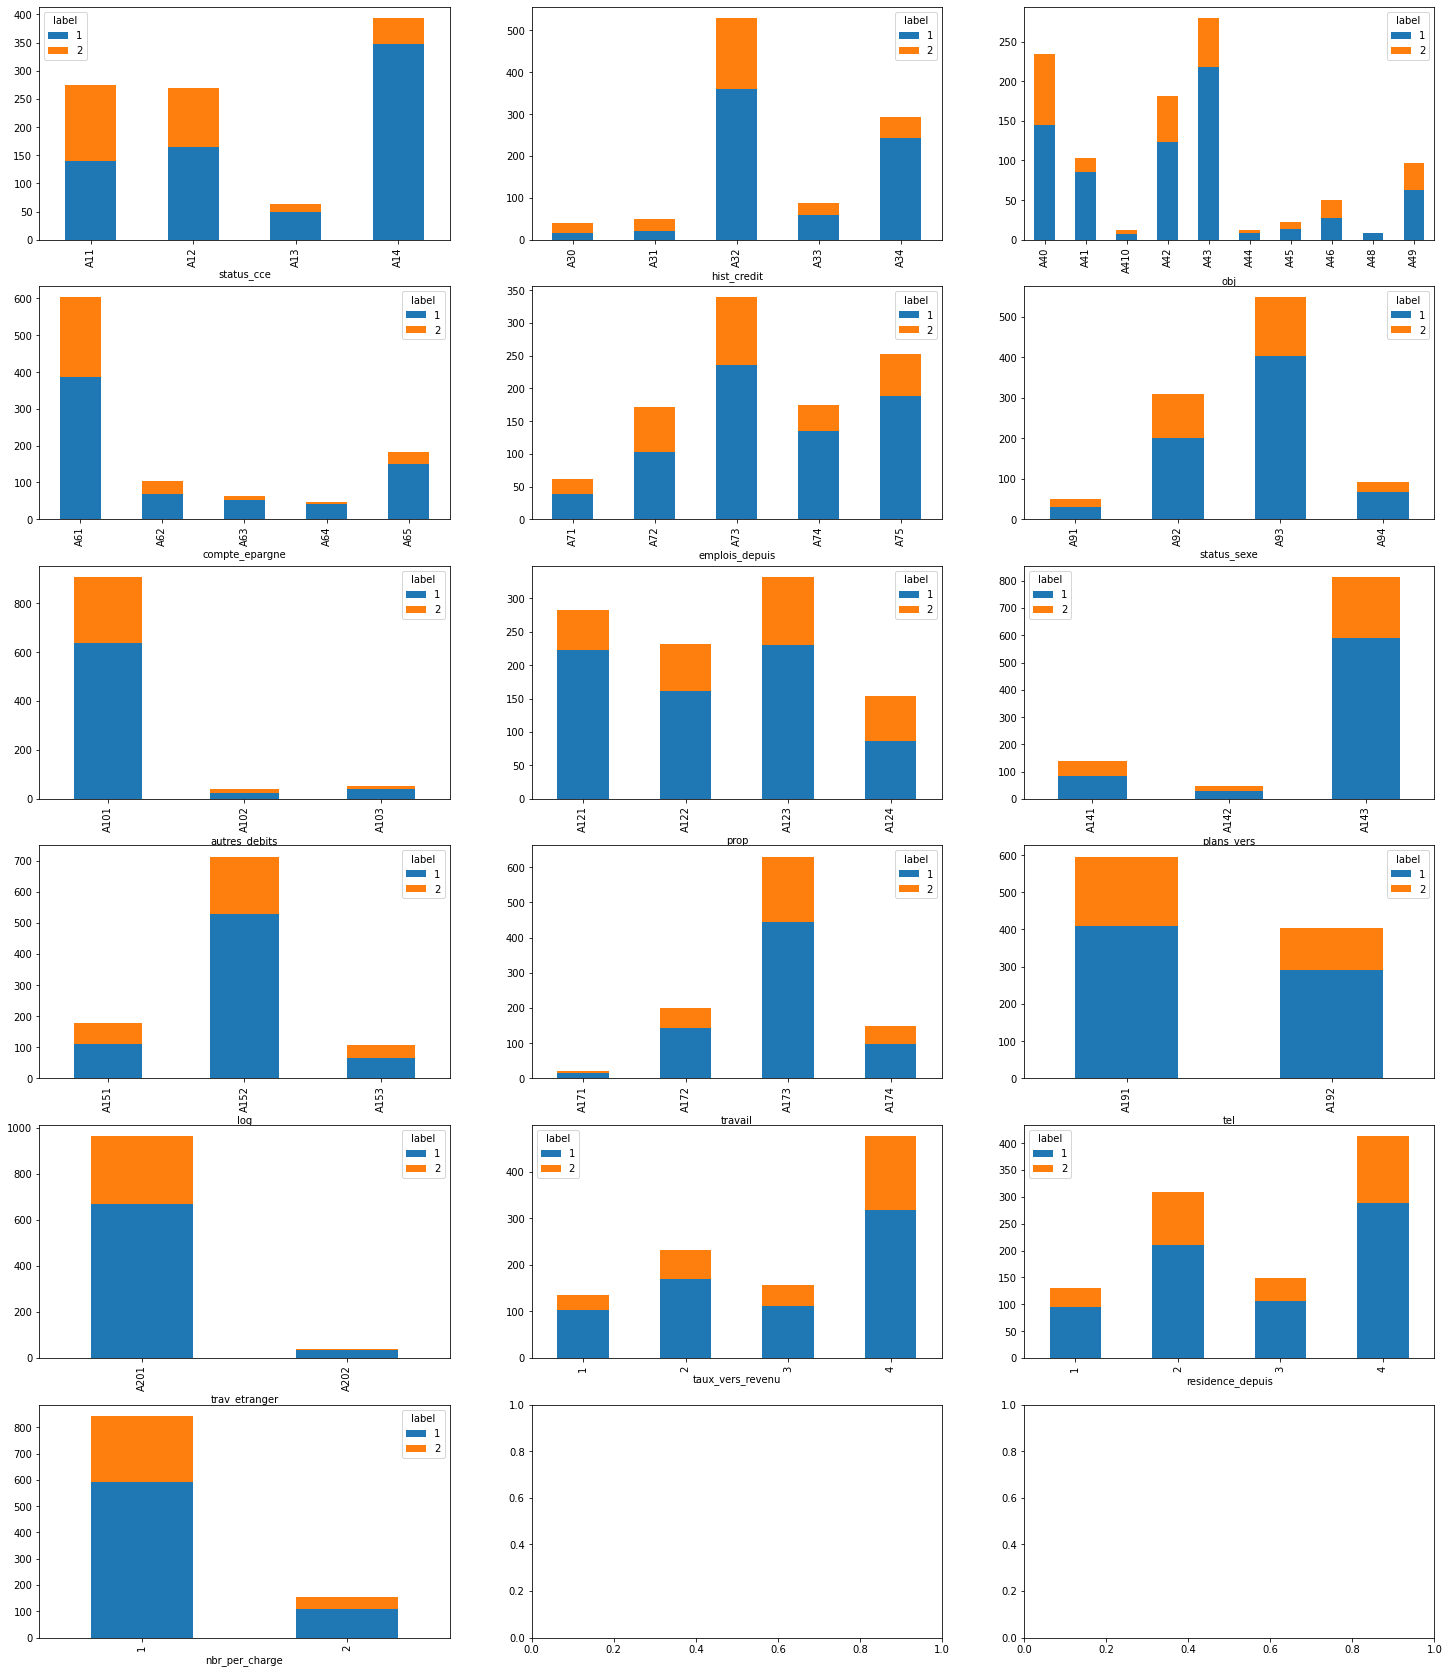

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 30))
for xcol, ax in zip(bank_categorical, [x for v in axes for x in v]):
    bank_df.groupby([xcol, 'label']).size().unstack("label").plot.bar(ax=ax,stacked=True)

### Variables Quantitaive

['duree_mois', 'nbr_credits', 'age', 'label', 'montant_credit']


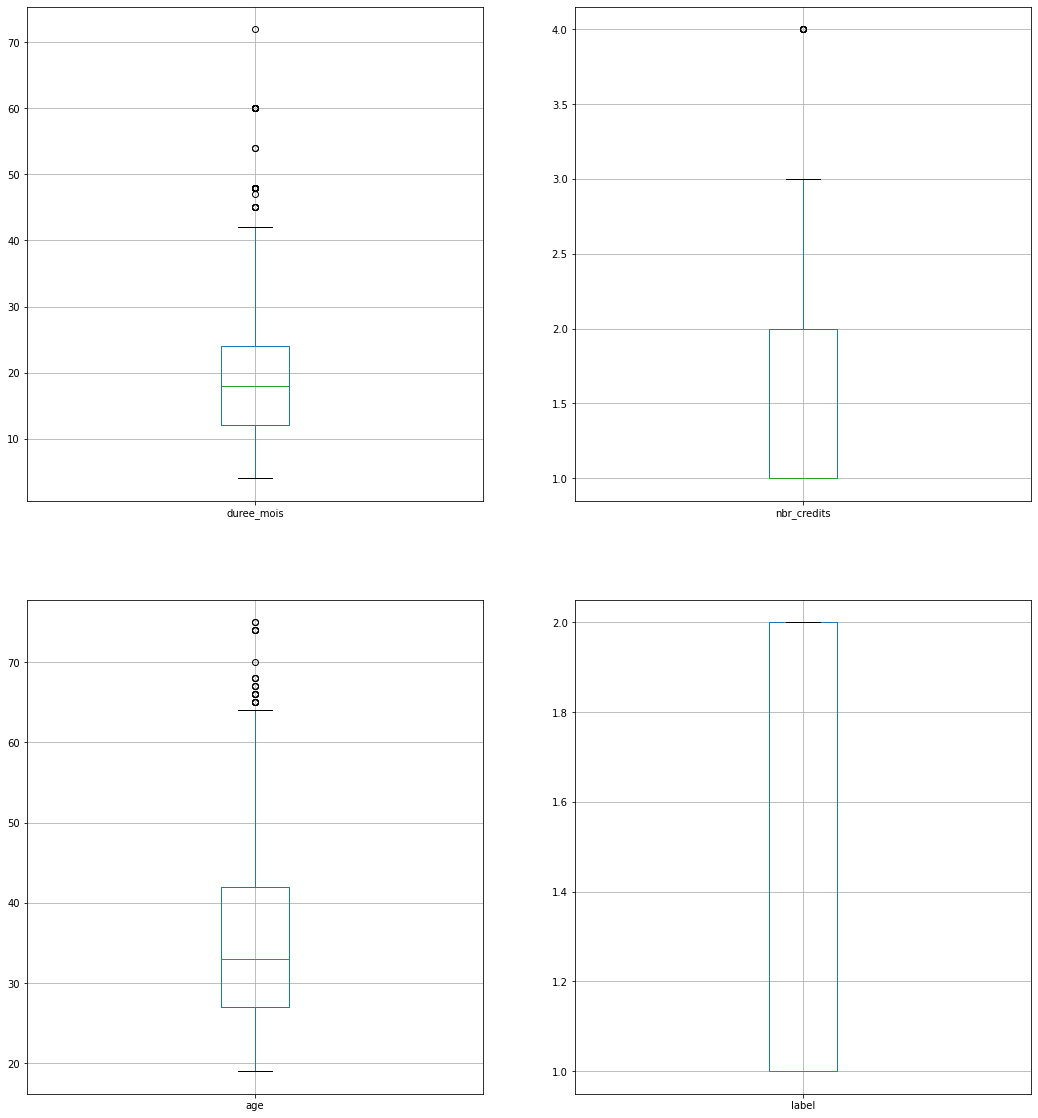

In [ ]:
print(bank_numerical)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 20))
for xcol, ax in zip(bank_numerical, [x for v in axes for x in v]):
    # bank_df.groupby([xcol, 'label']).size().unstack("label").plot.bar(ax=ax,stacked=True)
    bank_df.boxplot(ax=ax, column=[xcol])

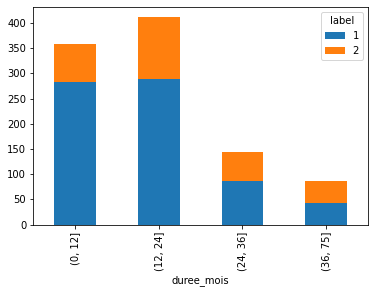

In [ ]:
bins = [0,12,24,36,75]
bank_df1 = bank_df[["duree_mois", "label"]].copy()
bank_df1["duree_mois"] = pd.cut(bank_df['duree_mois'], bins)
bank_df1.groupby(['duree_mois', 'label']).size().unstack("label").plot.bar(stacked=True)

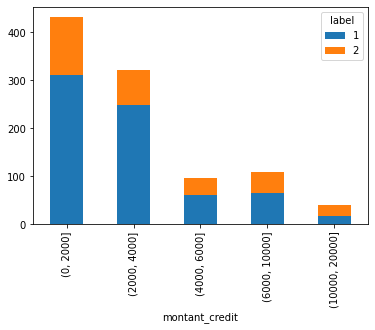

In [ ]:
bins = [0,2000,4000,6000,10000, 20000]
bank_df1 = bank_df[["montant_credit", "label"]].copy()
bank_df1["montant_credit"] = pd.cut(bank_df['montant_credit'], bins)
bank_df1.groupby(['montant_credit', 'label']).size().unstack("label").plot.bar(stacked=True)

### Réprtition des classes

1    700
2    300
Name: label, dtype: int64


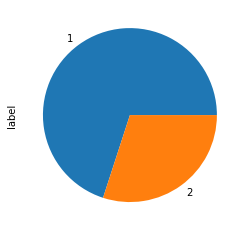

In [ ]:
print(bank_df['label'].value_counts())
bank_df['label'].value_counts().plot.pie()

Les individus appartenant à classe 1 représentent 70% de la population. L'autre portion d'individus (30%) est dédiée à la classe 2. 

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
bank_df1 = bank_df.copy()
for column in bank_df.select_dtypes(include=['object']).columns.to_list():
  bank_df1[column] = pd.factorize(bank_df[column])[0]

In [ ]:
bank_df1

,status_cce,duree_mois,hist_credit,obj,montant_credit,compte_epargne,emplois_depuis,taux_vers_revenu,status_sexe,autres_debits,residence_depuis,prop,age,plans_vers,log,nbr_credits,travail,nbr_per_charge,tel,trav_etranger,label
0,0,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0,1
1,1,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0,2
2,2,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0,1
3,0,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0,1
4,0,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,12,1,2,1736,1,2,3,1,0,4,0,31,0,0,1,1,1,1,0,1
996,0,30,1,4,3857,1,1,4,2,0,4,1,40,0,0,1,2,1,0,0,1
997,2,12,1,0,804,1,0,4,0,0,4,3,38,0,0,1,0,1,1,0,1
998,0,45,1,0,1845,1,1,4,0,0,4,2,23,0,1,1,0,1,0,0,2


In [ ]:
bank_df1.to_numpy()

array([[ 0,  6,  0, ...,  0,  0,  1],
       [ 1, 48,  1, ...,  1,  0,  2],
       [ 2, 12,  0, ...,  1,  0,  1],
       ...,
       [ 2, 12,  1, ...,  1,  0,  1],
       [ 0, 45,  1, ...,  0,  0,  2],
       [ 1, 45,  0, ...,  1,  0,  1]])

In [ ]:
bank_X_numerical = bank_df1[bank_numerical].to_numpy()
bank_X_numerical

array([[   6,    2,   67,    1, 1169],
       [  48,    1,   22,    2, 5951],
       [  12,    1,   49,    1, 2096],
       ...,
       [  12,    1,   38,    1,  804],
       [  45,    1,   23,    2, 1845],
       [  45,    1,   27,    1, 4576]])

In [ ]:
bank_X_categorical = bank_df1[bank_categorical].to_numpy()
bank_X_categorical

array([[0, 0, 0, ..., 4, 4, 1],
       [1, 1, 0, ..., 2, 2, 1],
       [2, 0, 1, ..., 2, 3, 2],
       ...,
       [2, 1, 0, ..., 4, 4, 1],
       [0, 1, 0, ..., 4, 4, 1],
       [1, 0, 4, ..., 3, 4, 1]])

In [ ]:
bank_X = bank_df1.loc[:, bank_df1.columns != 'label'].to_numpy()
bank_Y = bank_df1['label'].to_numpy()

Jusqu'à ce point on a bank_X, la matrice qui contient tous les individus et variables. bank_X_numerical contenant que les variables numériques. Ainsi que bank_X_categorical qui contient les variables catégorielles.

### Balancer les données

Comme constaté précédemment, les données de ce jeu de données ne sont pas équilibrées, et qu'il y avait une classe majoritaire avec 70% des individus. On a pensé à balancer nos données avec les trois familles de méthodes de balancement de données. 
Over Balancing avec SMOTE, Under Balancing avec Cluster Centroids, et la combinaison des deux avec SMOTEENN

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

#### Toutes les données

In [ ]:
smoteImbOver = SMOTE()
bank_X_smote, bank_Y_smote = smoteImbOver.fit_resample(bank_X, bank_Y)
bank_X_smote.shape, bank_Y_smote.shape

((1400, 20), (1400,))

In [ ]:
ccImbUnder = ClusterCentroids(random_state=42)
bank_X_cc, bank_Y_cc = ccImbUnder.fit_resample(bank_X, bank_Y)
bank_X_cc.shape, bank_Y_cc.shape

((600, 20), (600,))

In [ ]:
smoteImbCombine = SMOTEENN()
bank_X_smoteenn, bank_Y_smoteenn = smoteImbCombine.fit_resample(bank_X, bank_Y)
bank_X_smoteenn.shape, bank_Y_smoteenn.shape

((512, 20), (512,))

#### Données numériques

In [ ]:
smoteImbOver = SMOTE()
bank_X_numerical_smote, bank_Y_smote = smoteImbOver.fit_resample(bank_X_numerical, bank_Y)
bank_X_numerical_smote.shape, bank_Y_smote.shape

((1400, 5), (1400,))

In [ ]:
ccImbUnder = ClusterCentroids(random_state=42)
bank_X_numerical_cc, bank_Y_cc = ccImbUnder.fit_resample(bank_X_numerical, bank_Y)
bank_X_numerical_cc.shape, bank_Y_cc.shape

((600, 5), (600,))

In [ ]:
smoteImbCombine = SMOTEENN()
bank_X_numerical_smoteenn, bank_Y_smoteenn = smoteImbCombine.fit_resample(bank_X_numerical, bank_Y)
bank_X_numerical_smoteenn.shape, bank_Y_smoteenn.shape

((514, 5), (514,))

#### Données catégorielles

In [ ]:
smoteImbOver = SMOTE()
bank_X_categorical_smote, bank_Y_smote = smoteImbOver.fit_resample(bank_X_categorical, bank_Y)
bank_X_categorical_smote.shape, bank_Y_smote.shape

((1400, 16), (1400,))

In [ ]:
ccImbUnder = ClusterCentroids(random_state=42)
bank_X_categorical_cc, bank_Y_cc = ccImbUnder.fit_resample(bank_X_categorical, bank_Y)
bank_X_categorical_cc.shape, bank_Y_cc.shape

((600, 16), (600,))

In [ ]:
smoteImbCombine = SMOTEENN()
bank_X_categorical_smoteenn, bank_Y_smoteenn = smoteImbCombine.fit_resample(bank_X_categorical, bank_Y)
bank_X_categorical_smoteenn.shape, bank_Y_smoteenn.shape

((744, 16), (744,))

## Classification

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold

Les méthodes de classification qu'on va utiliser sont: 
- La regression logistique.
- Arbre de classification et de regression (CART).
- Forets Aléatoires.
- Classifieur de Naives Bayes.
- K Nearest Neighbors.

On essaiera de classifier les individus selon chacun des 3 jeux de données (Toutes les variables, Variables numériques, Variables catégorielles.) avec ses variants de balancement.

### Numerical Data

In [ ]:
%%capture
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, bank_X_numerical, bank_Y, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, bank_X_numerical_smote, bank_Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, bank_X_numerical_cc, bank_Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, bank_X_numerical_smoteenn, bank_Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
numerical_data_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')

In [ ]:
numerical_data_results

mean       max       std
LR   original  0.990000  1.000000  0.010000
     smote     0.987143  1.000000  0.010973
     cc        0.986667  1.000000  0.029627
     smoteenn  0.988235  1.000000  0.023529
LDA  original  0.705000  0.780000  0.047381
     smote     0.555714  0.657143  0.054192
     cc        0.355000  0.450000  0.099736
     smoteenn  0.611501  0.725490  0.084045
KNN  original  0.662000  0.740000  0.055642
     smote     0.633571  0.721429  0.057592
     cc        0.401667  0.500000  0.076540
     smoteenn  0.889894  1.000000  0.090383
CART original  1.000000  1.000000  0.000000
     smote     1.000000  1.000000  0.000000
     cc        1.000000  1.000000  0.000000
     smoteenn  1.000000  1.000000  0.000000
RF   original  1.000000  1.000000  0.000000
     smote     1.000000  1.000000  0.000000
     cc        1.000000  1.000000  0.000000
     smoteenn  1.000000  1.000000  0.000000
NB   original  1.000000  1.000000  0.000000
     smote     1.000000  1.000000  0.000000
     cc        1.000000  1.000000  0.000000
     smoteenn  1.000000  1.000000  0.000000

Sur les données numériques, on a pu arriver à de bonne performances en terme de la métrique d'Accuracy, en constatant que le balancement de données n'a pas toujours aidé à améliorer les performances, et parfois il a même conduit à des dégradation en performances.

Ceci peut se justifier par le fait que l'inéquilibre n'est pas très significatif (70% face à 30%). Ainsi, le nombre d'individus étant pas très grand, certaines méthdoes de balancement de données font réduire encre plus ce nombre d'individus ce qui ramène à des jeux de données moins riches en termes de données.

Le classifieur Naives Bayes étant l'un des meilleurs algorithme pour ce jeu de données, vu qu'il propose des séparation qui peuvent être quadratiques et donc plus adéquate aux différentes formes de données. Et c'est la raison pour laquelle la LDA n'a pas bien perofrmé vu la non-égalité entre les volumes et les formes des deux classes.

Les arbres de classification ont également donnée de bons résultats, 

### Cateogircal Data

In [ ]:
%%capture
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, bank_X_categorical, bank_Y, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, bank_X_categorical_smote, bank_Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, bank_X_categorical_cc, bank_Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, bank_X_categorical_smoteenn, bank_Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
categorical_data_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')

In [ ]:
categorical_data_results

mean       max       std
LR   original  0.736000  0.790000  0.034409
     smote     0.695714  0.735714  0.036169
     cc        0.556667  0.650000  0.065064
     smoteenn  0.842324  0.959459  0.105917
LDA  original  0.732000  0.790000  0.031875
     smote     0.697857  0.742857  0.042022
     cc        0.566667  0.650000  0.062805
     smoteenn  0.858468  0.972973  0.095124
KNN  original  0.719000  0.770000  0.037000
     smote     0.753571  0.928571  0.106964
     cc        0.491667  0.650000  0.060668
     smoteenn  0.901694  1.000000  0.114684
CART original  0.666000  0.740000  0.043863
     smote     0.716429  0.885714  0.087485
     cc        0.638333  0.816667  0.096047
     smoteenn  0.875946  0.959459  0.073187
RF   original  0.743000  0.820000  0.037961
     smote     0.799286  0.957143  0.086923
     cc        0.683333  0.850000  0.118322
     smoteenn  0.916505  1.000000  0.078269
NB   original  0.699000  0.760000  0.041821
     smote     0.626429  0.900000  0.176850
     cc        0.566667  0.800000  0.123153
     smoteenn  0.853189  0.986486  0.151172

### All Data

In [ ]:
%%capture
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, bank_X, bank_Y, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, bank_X_smote, bank_Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, bank_X_cc, bank_Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, bank_X_smoteenn, bank_Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
all_data_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')

In [ ]:
all_data_results

mean       max       std
LR   original  0.734000  0.790000  0.050040
     smote     0.707857  0.771429  0.034912
     cc        0.611667  0.716667  0.074554
     smoteenn  0.711199  0.901961  0.103766
LDA  original  0.738000  0.790000  0.042849
     smote     0.721429  0.814286  0.058815
     cc        0.616667  0.733333  0.064550
     smoteenn  0.723115  0.921569  0.118606
KNN  original  0.660000  0.740000  0.054222
     smote     0.667143  0.757143  0.062532
     cc        0.406667  0.483333  0.054365
     smoteenn  0.813122  0.941176  0.102385
CART original  0.687000  0.730000  0.029682
     smote     0.735000  0.842857  0.070959
     cc        0.745000  0.816667  0.055302
     smoteenn  0.764027  0.941176  0.143601
RF   original  0.766000  0.850000  0.057306
     smote     0.816429  0.957143  0.073056
     cc        0.786667  0.866667  0.062716
     smoteenn  0.822775  0.980392  0.108510
NB   original  0.726000  0.760000  0.032619
     smote     0.724286  0.892857  0.107009
     cc        0.675000  0.833333  0.081735
     smoteenn  0.731033  0.941176  0.157865